# **Importing Libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import (
    VGG16, ResNet50, InceptionV3, MobileNetV2
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt

**Loading the dataset**

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
num_classes = 10

**Normalizing**

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
x_train.shape
# x_test.shape

(50000, 32, 32, 3)

Resizing the image and RGB

In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 32

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = (
    tf.data.Dataset.from_tensor_slices((x_train, y_train))
    .shuffle(10000)
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

test_ds = (
    tf.data.Dataset.from_tensor_slices((x_test, y_test))
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)



In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float64, name=None))>

**Model Building**

In [ ]:
# def build_model(base_model, model_name):
#     base_model.trainable = False

#     model = models.Sequential([
#         base_model,
#         layers.GlobalAveragePooling2D(),
#         layers.Dense(256, activation='relu'),
#         layers.Dropout(0.5),
#         layers.Dense(num_classes, activation='softmax')
#     ])

#     model.compile(
#         optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
#         loss='categorical_crossentropy',
#         metrics=['accuracy']
#     )

#     return model


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

base_model = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False

model_vgg = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

model_vgg.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model_vgg.fit(train_ds, epochs=5, validation_data=test_ds)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 335s 204ms/step - accuracy: 0.4036 - loss: 1.7094 - val_accuracy: 0.6517 - val_loss: 1.0671
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 310s 198ms/step - accuracy: 0.5973 - loss: 1.1838 - val_accuracy: 0.6773 - val_loss: 0.9619
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 341s 218ms/step - accuracy: 0.6387 - loss: 1.0615 - val_accuracy: 0.6978 - val_loss: 0.8999
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 310s 199ms/step - accuracy: 0.6605 - loss: 0.9912 - val_accuracy: 0.7102 - val_loss: 0.8533
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 310s 198ms/step - accuracy: 0.6821 - loss: 0.9331 - val_accuracy: 0.7171 - val_loss: 0.8290


In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False

inputs = tf.keras.Input(shape=(224,224,3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model_resnet = tf.keras.Model(inputs, outputs)

model_resnet.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model_resnet.fit(train_ds, epochs=5, validation_data=test_ds)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 176s 105ms/step - accuracy: 0.1137 - loss: 2.3097 - val_accuracy: 0.1658 - val_loss: 2.2589
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 153s 98ms/step - accuracy: 0.1775 - loss: 2.2443 - val_accuracy: 0.1809 - val_loss: 2.2027
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 153s 98ms/step - accuracy: 0.2108 - loss: 2.1846 - val_accuracy: 0.2513 - val_loss: 2.1414
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 153s 98ms/step - accuracy: 0.2300 - loss: 2.1284 - val_accuracy: 0.2524 - val_loss: 2.0896
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 153s 98ms/step - accuracy: 0.2508 - loss: 2.0792 - val_accuracy: 0.2550 - val_loss: 2.0464


Fine Tuning ResNet

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
import tensorflow as tf

base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)



In [ ]:
# Freeze all layers first
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze top 30 layers
for layer in base_model.layers[-30:]:
    layer.trainable = True


In [ ]:
inputs = tf.keras.Input(shape=(224,224,3))
x = base_model(inputs)
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model_resnet_ft = models.Model(inputs, outputs)


In [ ]:
model_resnet_ft.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
history = model_resnet_ft.fit(
    train_ds,
    validation_data=test_ds,
    epochs=5
)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 224s 143ms/step - accuracy: 0.3219 - loss: 2.0784 - val_accuracy: 0.3734 - val_loss: 1.7411
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 211s 135ms/step - accuracy: 0.4746 - loss: 1.5180 - val_accuracy: 0.4375 - val_loss: 1.8544
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 262s 135ms/step - accuracy: 0.5093 - loss: 1.3964 - val_accuracy: 0.4313 - val_loss: 1.8073
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 261s 135ms/step - accuracy: 0.5336 - loss: 1.3290 - val_accuracy: 0.3792 - val_loss: 2.4532
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 210s 135ms/step - accuracy: 0.5473 - loss: 1.2791 - val_accuracy: 0.3375 - val_loss: 2.0628


In [ ]:
test_loss, test_acc = model_resnet_ft.evaluate(test_ds)
print("Fine-tuned ResNet50 Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.3384 - loss: 2.0514
Fine-tuned ResNet50 Accuracy: 0.3375000059604645


In [ ]:
from tensorflow.keras.applications import InceptionV3

base_model = InceptionV3(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model_inception = tf.keras.Model(base_model.input, outputs)

model_inception.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model_inception.fit(train_ds, epochs=5, validation_data=test_ds)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 154s 88ms/step - accuracy: 0.6140 - loss: 1.1596 - val_accuracy: 0.8034 - val_loss: 0.5797
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 175s 77ms/step - accuracy: 0.7907 - loss: 0.6263 - val_accuracy: 0.8205 - val_loss: 0.5257
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.8163 - loss: 0.5490 - val_accuracy: 0.8295 - val_loss: 0.5095
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 75ms/step - accuracy: 0.8282 - loss: 0.5024 - val_accuracy: 0.8365 - val_loss: 0.4800
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.8385 - loss: 0.4769 - val_accuracy: 0.8398 - val_loss: 0.4728


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers


In [ ]:
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False


In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model_mobilenet = tf.keras.Model(inputs, outputs)


In [ ]:
model_mobilenet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
model_mobilenet.fit(
    train_ds,
    epochs=5,
    validation_data=test_ds
)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 47ms/step - accuracy: 0.5300 - loss: 1.3848 - val_accuracy: 0.7714 - val_loss: 0.6653
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7467 - loss: 0.7288 - val_accuracy: 0.7938 - val_loss: 0.5973
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7791 - loss: 0.6396 - val_accuracy: 0.7997 - val_loss: 0.5672
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7946 - loss: 0.5933 - val_accuracy: 0.8074 - val_loss: 0.5468
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 37ms/step - accuracy: 0.8039 - loss: 0.5628 - val_accuracy: 0.8144 - val_loss: 0.5300


In [ ]:
vgg_loss, vgg_acc = model_vgg.evaluate(test_ds, verbose=0)
resnet_loss, resnet_acc = model_resnet.evaluate(test_ds, verbose=0)
inception_loss, inception_acc = model_inception.evaluate(test_ds, verbose=0)
mobilenet_loss, mobilenet_acc = model_mobilenet.evaluate(test_ds, verbose=0)


In [ ]:
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": ["VGG16", "ResNet50", "InceptionV3", "MobileNetV2"],
    "Test Accuracy": [vgg_acc, resnet_acc, inception_acc, mobilenet_acc],
    "Test Loss": [vgg_loss, resnet_loss, inception_loss, mobilenet_loss]
})

comparison_df


Model  Test Accuracy  Test Loss
0        VGG16         0.7171   0.828979
1     ResNet50         0.2550   2.046414
2  InceptionV3         0.8398   0.472824
3  MobileNetV2         0.8144   0.530035

In [ ]:
def model_parameters(model):
    return model.count_params()

param_df = pd.DataFrame({
    "Model": ["VGG16", "ResNet50", "InceptionV3", "MobileNetV2"],
    "Parameters (Millions)": [
        model_vgg.count_params() / 1e6,
        model_resnet.count_params() / 1e6,
        model_inception.count_params() / 1e6,
        model_mobilenet.count_params() / 1e6
    ]
})

param_df


Model  Parameters (Millions)
0        VGG16              21.140042
1     ResNet50              24.114826
2  InceptionV3              22.329898
3  MobileNetV2               2.588490

In [ ]:
final_df = comparison_df.merge(param_df, on="Model")
final_df


Model  Test Accuracy  Test Loss  Parameters (Millions)
0        VGG16         0.7171   0.828979              21.140042
1     ResNet50         0.2550   2.046414              24.114826
2  InceptionV3         0.8398   0.472824              22.329898
3  MobileNetV2         0.8144   0.530035               2.588490

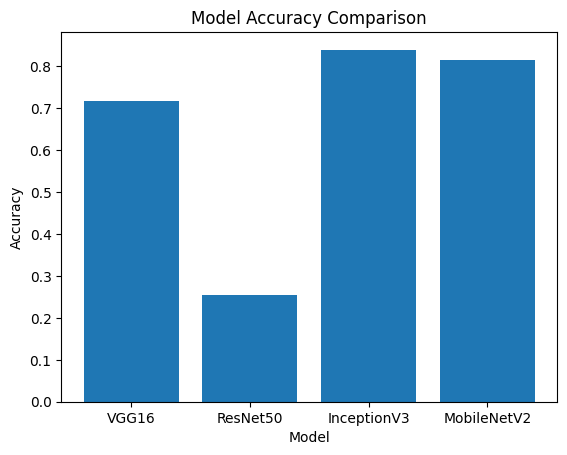

In [ ]:
import matplotlib.pyplot as plt

models = final_df["Model"]
accuracy = final_df["Test Accuracy"]

plt.figure()
plt.bar(models, accuracy)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()
